# Clustering

## Read Dataset

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from pprint import pprint
from time import time

df = pd.read_csv('/content/online_retail_II.csv', delimiter=',')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


Variabel in the Dataset

Invoice: Kode unik

StockCode: Kode barang

Description: Product name

Quantity: Quantities of each item per transactions.

InvoiceDate: Invoice date and time.

UnitPrice: Price per unit.

CustomerID: Customer number.

Country: Country where a customer resides.

## Deskriptif Statistik

In [ ]:
#dimensi dataframe
df.shape

(1067371, 8)

In [ ]:
#Tipe data setiap variabel
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
#Korelasi
df.corr()

,Quantity,Price,Customer ID
Quantity,1.000000,-0.001319,-0.005430
Price,-0.001319,1.000000,-0.003835
Customer ID,-0.005430,-0.003835,1.000000


In [ ]:
df.describe()

#Quantity dan Harga memiliki nilai min yang negatif, yang mungkin mengakibatkan terdapat pembatalan transaksi.

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

## Data Cleansing

In [ ]:
#Missing Value

df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
# Data yang dibatalkan, pada invoice akan memiliki huruf 'C' dan dapat terlihat nilai kuantitas yang memiliki nilai negatif
df[df.Invoice.str.contains('C', na=False)]

#terdapat 19494 pesanan yang dibatalkan.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Data yang dibatalkan, pada invoice akan memiliki huruf 'C', dan akan dihapus dari dataset

df = df[~df["Invoice"].str.contains("C", na=False)]

In [ ]:
#Mengurangi transaksi yang dibatalkan dan nilai dengan kuantitas dan harga nol

df = df[~df["Invoice"].str.contains("C", na=False)]

df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236121
Country             0
dtype: int64

In [ ]:
#Drop Missing Value
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


Dataset ini dengan menggunakan metode clustering. 

## EDA

In [ ]:
#unique Value
uniq_values = df.nunique()
uniq_values

Invoice        36969
StockCode       4631
Description     5283
Quantity         437
InvoiceDate    34585
Price            665
Customer ID     5878
Country           41
dtype: int64

In [ ]:
#Visualisasi data item yang paling banyak terjual
most_sold = df['Description'].value_counts().head(15)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

WHITE HANGING HEART T-LIGHT HOLDER    5181
REGENCY CAKESTAND 3 TIER              3428
ASSORTED COLOUR BIRD ORNAMENT         2777
JUMBO BAG RED RETROSPOT               2702
REX CASH+CARRY JUMBO SHOPPER          2141
PARTY BUNTING                         2121
LUNCH BAG  BLACK SKULL.               2117
LUNCH BAG SPACEBOY DESIGN             1941
HOME BUILDING BLOCK WORD              1929
STRAWBERRY CERAMIC TRINKET BOX        1922
HEART OF WICKER SMALL                 1899
60 TEATIME FAIRY CAKE CASES           1880
HEART OF WICKER LARGE                 1864
LUNCH BAG CARS BLUE                   1864
PAPER CHAIN KIT 50'S CHRISTMAS        1852
Name: Description, dtype: int64


Text(0.5, 1.0, 'Items Most Sold')

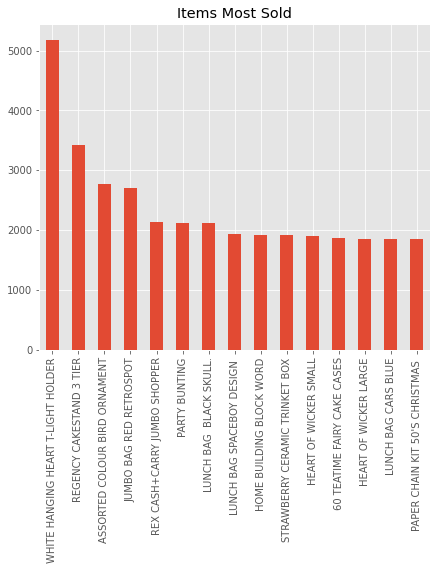

In [ ]:
#Bar plot dari item yang paling banyak terjual
plt.figure(figsize=(7,6))
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

In [ ]:
Top_Buyer = df['Customer ID'].value_counts().head(20)
Top_Buyer

17841.0    12890
14911.0    11245
12748.0     7228
14606.0     6566
14096.0     5111
15311.0     4434
14156.0     4048
14646.0     3849
13089.0     3362
16549.0     3250
14298.0     2864
17850.0     2796
15039.0     2792
14527.0     2701
15005.0     2454
13081.0     2354
13263.0     1920
17511.0     1911
16782.0     1883
14159.0     1874
Name: Customer ID, dtype: int64

Text(0.5, 1.0, 'Top Buyer')

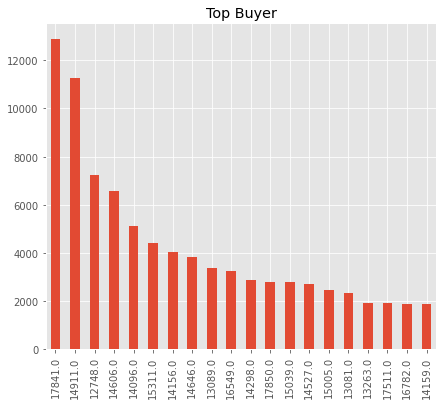

In [ ]:
#Pembeli terbanyak berdasarkan Customer ID
Top_Buyer = df['Customer ID'].value_counts().head(20)
plt.figure(figsize=(7,6))
Top_Buyer.plot(kind='bar')
plt.title('Top Buyer')

In [ ]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
WHITE HANGING HEART T-LIGHT HOLDER,93640
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,79913
MEDIUM CERAMIC TOP STORAGE JAR,77916


In [ ]:
#Top Country
df["Country"].value_counts()

United Kingdom          725250
Germany                  16694
EIRE                     15743
France                   13812
Netherlands               5088
Spain                     3719
Belgium                   3068
Switzerland               3011
Portugal                  2446
Australia                 1812
Channel Islands           1569
Italy                     1468
Norway                    1436
Sweden                    1319
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Greece                     657
Unspecified                521
Poland                     512
Japan                      485
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     322
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        122
Brazil                      94
Thailand

Text(0.5, 1.0, 'Top Buyer')

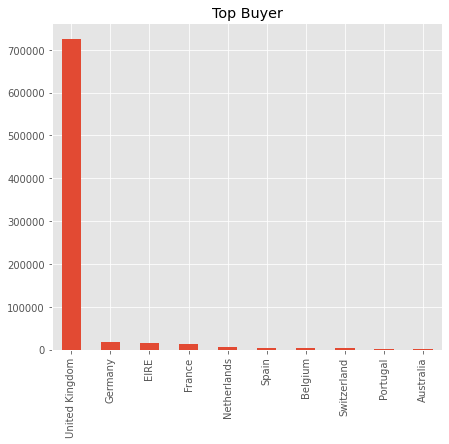

In [ ]:
Top_Country = df["Country"].value_counts().head(10)
plt.figure(figsize=(7,6))
Top_Country.plot(kind='bar')
plt.title('Top Buyer')

### Preprocessing

### RFM Metrics



In [ ]:
# Total Pembelanjaan
df['TotalPrice'] = df['Price']*df['Quantity']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


calculate Recency = number of days since last purchase.

calculate Frequency = number of purchases during the period.

calculate Monetary = total amount of purchases made during the studied period

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
 8   TotalPrice   805549 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.5+ MB


In [ ]:
#Ubah Tipe InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  object        
 8   TotalPrice   805549 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.5+ MB


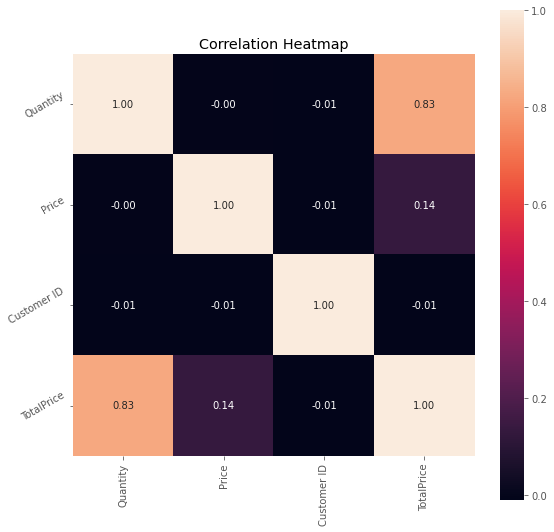

In [ ]:
correlation = df.corr()

plt.figure(figsize=(9,9))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
#Recency = Tanggal hari ini - invoice date yang paling terbaru
#Frequency = nilai unik pada invoice
#Monetary = quantity * price
today_date = dt.datetime(2011, 12, 10) #transaksi terakhir

rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

rfm=rfm[(rfm["monetary"]>0)]

rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,325,12,77556.46
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,18,4,4428.69
12350.0,310,1,334.40


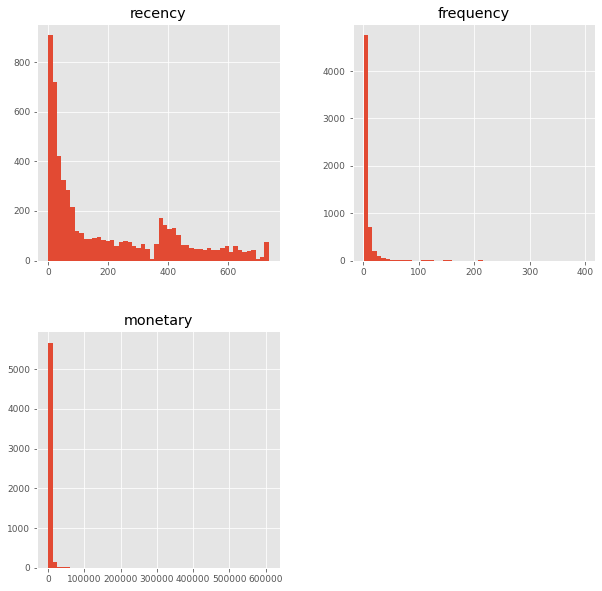

In [ ]:
# Melihat distribusi data recency, frequency, monetary dari histogram
rfm.hist(figsize=(10, 10), bins=50, xlabelsize=9, ylabelsize=9); 

Dapat dilihat bahwa data memiliki kemiringan ke kanan. Hal ini dapat menandakan bahwa nilai mean > med > mode, dimana ini memiliki kecendrungan skewness positif dan data memiliki nilai outlier.

In [ ]:
rfm.describe()

,recency,frequency,monetary
count,5878.000000,5878.000000,5878.000000
mean,200.866791,6.289384,3018.616737
std,209.353961,13.009406,14737.731040
min,0.000000,1.000000,2.950000
25%,25.000000,1.000000,348.762500
50%,95.000000,3.000000,898.915000
75%,379.000000,7.000000,2307.090000
max,738.000000,398.000000,608821.650000


In [ ]:
# RFM Score
# Keterangan Score

rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,325,12,77556.46,2,5,5,25
12347.0,2,8,5633.32,5,4,5,54
12348.0,75,5,2019.40,3,4,4,34
12349.0,18,4,4428.69,5,3,5,53
12350.0,310,1,334.40,2,1,2,21


In [ ]:
rfm['recency_score'] = pd.qcut(rfm['recency'],q=5,labels=[5,4,3,2,1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm['monetary_score']  = pd.qcut(rfm['monetary'],5,labels=[1,2,3,4,5])

# Various implementations of an RFM analysis system may use slightly different values or scaling, however.
# The collection of three values for each customer is called an RFM cell but we will use RF here

rfm['RF_SCORE'] = rfm['recency_score'].astype('str') + rfm['frequency_score'].astype('str')
rf = rfm
rf.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,RF_SCORE
Customer ID,,,,,,,,
12346.0,325,12,77556.46,2,5,5,25,25
12347.0,2,8,5633.32,5,4,5,54,54
12348.0,75,5,2019.40,3,4,4,34,34
12349.0,18,4,4428.69,5,3,5,53,53
12350.0,310,1,334.40,2,1,2,21,21


## Modelling

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler

encoder = OneHotEncoder()
encoder.fit(rf.select_dtypes(include='object'))
X_onehot = pd.DataFrame(encoder.transform(rf.select_dtypes(include='object')).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([rf.select_dtypes(exclude='object'), X_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X_scaled.head().T

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE_11,RFM_SCORE_12,RFM_SCORE_13,RFM_SCORE_14,...,RF_SCORE_41,RF_SCORE_42,RF_SCORE_43,RF_SCORE_44,RF_SCORE_45,RF_SCORE_51,RF_SCORE_52,RF_SCORE_53,RF_SCORE_54,RF_SCORE_55
0,NaN,NaN,NaN,NaN,NaN,NaN,-0.308564,-0.265111,-0.179258,-0.11136,...,-0.138097,-0.167814,-0.208551,-0.231503,-0.241923,-0.098075,-0.140634,-0.184253,-0.220696,-0.330554
1,NaN,NaN,NaN,NaN,NaN,NaN,-0.308564,-0.265111,-0.179258,-0.11136,...,-0.138097,-0.167814,-0.208551,-0.231503,-0.241923,-0.098075,-0.140634,-0.184253,4.531130,-0.330554
2,NaN,NaN,NaN,NaN,NaN,NaN,-0.308564,-0.265111,-0.179258,-0.11136,...,-0.138097,-0.167814,-0.208551,-0.231503,-0.241923,-0.098075,-0.140634,-0.184253,-0.220696,-0.330554
3,NaN,NaN,NaN,NaN,NaN,NaN,-0.308564,-0.265111,-0.179258,-0.11136,...,-0.138097,-0.167814,-0.208551,-0.231503,-0.241923,-0.098075,-0.140634,5.427334,-0.220696,-0.330554
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.308564,-0.265111,-0.179258,-0.11136,...,-0.138097,-0.167814,-0.208551,-0.231503,-0.241923,-0.098075,-0.140634,-0.184253,-0.220696,-0.330554


In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

X = rf.iloc[:,:-1].astype(float).values
scaler = StandardScaler().fit(X)
X_new= scaler.transform(X)
X_new


array([[ 0.59298505,  0.43899789,  5.05805027, ...,  1.41409328,
         1.41409328, -0.54047696],
       [-0.94998781,  0.13150188,  0.17743068, ...,  0.70704664,
         1.41409328,  1.39447461],
       [-0.60126639, -0.09912012, -0.06780567, ...,  0.70704664,
         0.70704664,  0.06002525],
       ...,
       [ 2.19328197, -0.40661612, -0.17586406, ..., -0.70704664,
        -0.70704664, -1.40786905],
       [ 1.31431292, -0.32974212, -0.11686556, ...,  0.        ,
         0.70704664, -1.34114658],
       [-0.75890758,  0.05462788,  0.079013  , ...,  0.70704664,
         1.41409328,  0.72724993]])

### K-Means

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(X_new)
labels = k_means.labels_
rf['cluster_labels'] = labels
rf.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,RF_SCORE,cluster_labels
Customer ID,,,,,,,,,
12346.0,325,12,77556.46,2,5,5,25,25,0
12347.0,2,8,5633.32,5,4,5,54,54,0
12348.0,75,5,2019.40,3,4,4,34,34,0
12349.0,18,4,4428.69,5,3,5,53,53,0
12350.0,310,1,334.40,2,1,2,21,21,1


In [ ]:
rf['cluster_labels'].value_counts()

0    3257
1    2599
2      22
Name: cluster_labels, dtype: int64

In [ ]:
# check centroids nya
centroids = k_means.cluster_centers_
centroids

array([[-0.72100393,  0.18821918,  0.04750633,  0.73647855,  0.54814024,
         0.51384077,  0.74933369],
       [ 0.91075427, -0.3248617 , -0.15921645, -0.93344626, -0.69806913,
        -0.65590206, -0.95005382],
       [-0.85184205, 10.51298622, 11.77615491,  1.24164474,  1.31767783,
         1.41409328,  1.30045658]])

#### Elbow Methods

In [ ]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(X_new)
    inertia_list.append(kmeans_model.inertia_)    
    print("For n_clusters = {}, inertia value is {})".format(num_clusters, kmeans_model.inertia_))

For n_clusters = 1, inertia value is 41146.00000000009)
For n_clusters = 2, inertia value is 24131.420630760058)
For n_clusters = 3, inertia value is 18742.513663177822)
For n_clusters = 4, inertia value is 14354.569617537398)
For n_clusters = 5, inertia value is 12167.626479132497)
For n_clusters = 6, inertia value is 10325.261249641908)
For n_clusters = 7, inertia value is 9171.538094828506)
For n_clusters = 8, inertia value is 8166.101511234862)
For n_clusters = 9, inertia value is 7491.507736037329)
For n_clusters = 10, inertia value is 6839.749398598277)


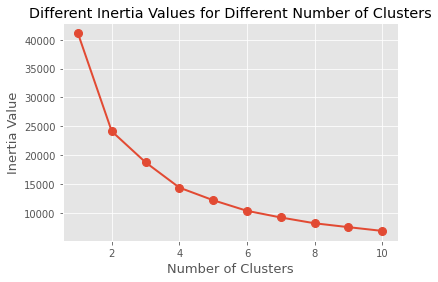

In [ ]:
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=2.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 2))
print(round(kneedle.elbow, 2))

4
4


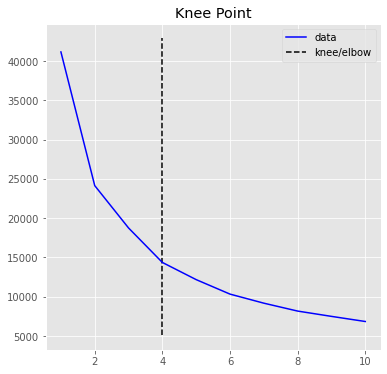

In [ ]:
plt.style.use('ggplot')
#kneedle.plot_knee_normalized()
kneedle.plot_knee()

# sampai di stage ini kita mendapatkan k=4 yg optimal
# reference
# https://www.kaggle.com/kevinarvai/knee-elbow-point-detection

In [ ]:
#Silhoutte score
silhouette_scores = []

# may take a longer time to run
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_new)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X_new, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.488s
Calculating silhouette coefficient..
Done calculating in 0.691s
Clustering with n_clusters=3
Done clustering in 0.252s
Calculating silhouette coefficient..
Done calculating in 0.491s
Clustering with n_clusters=4
Done clustering in 0.381s
Calculating silhouette coefficient..
Done calculating in 0.475s
Clustering with n_clusters=5
Done clustering in 0.220s
Calculating silhouette coefficient..
Done calculating in 0.490s
Clustering with n_clusters=6
Done clustering in 0.689s
Calculating silhouette coefficient..
Done calculating in 0.485s
Clustering with n_clusters=7
Done clustering in 0.240s
Calculating silhouette coefficient..
Done calculating in 0.474s
Clustering with n_clusters=8
Done clustering in 0.634s
Calculating silhouette coefficient..
Done calculating in 0.474s
Clustering with n_clusters=9
Done clustering in 0.438s
Calculating silhouette coefficient..
Done calculating in 0.699s
Clustering with n_clusters=10
Done clustering in

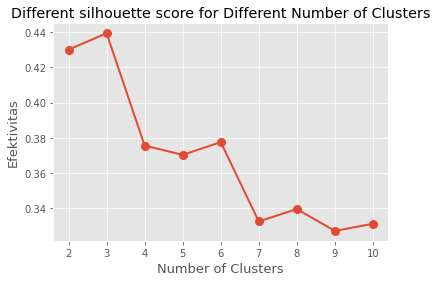

In [ ]:
plt.plot(range(2,11),silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Efektivitas", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()

# silhoute score paling tinggi k=3

#### Visualization

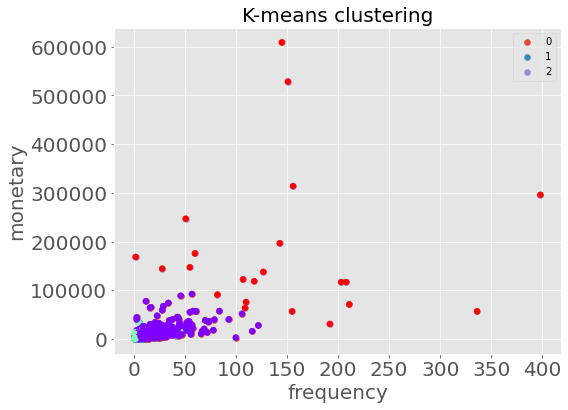

In [ ]:
x1 = rf['frequency']
x2 = rf['monetary']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels) 
for i in u_labels:
    plt.scatter(x1[rf['cluster_labels'] == i] , x2[rf['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_means.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-means clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

x_val = 'recency'
y_val = 'frequency'
z_val = 'monetary'

fig = px.scatter_3d(rf, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

Cluster 0:
Untuk membandingkan kluster, kluster 0 merupakan yang paling sedikit menghabiskan uang untuk berbelanja ketika dibandingkan dengan kluster lainnya. Total recency yang paling sedikit. Kelompok ini diklasifikasi sebagai seseorang yang telah berhenti atau lama tidak berbelanja di market.

Cluster 1:
Kelompok ini merupakan kelompok yang sering berbelanja atau mengunjungi toko secara online, tetapi untuk jumlah total pembelian masih sangat kurang. 

Cluster 2:
Pada kelompok ini, kita dapat melihat paling banyak menghabiskan uang dan paling banyak membeli barang.